# Give it a try....

This Notebook was created in order to get in touch with the GANerAid library which offers functions to synthetisise tabular data, using the technology of Generative Adversarial Networks. It was meant to generate synthetic patient data “reflecting” the original input of clinicals trials to get the most out of it. From Data Science perspective as well as Data Privacy. 

To get it up an running quickly we prepared this little walktrough for you which was set up with kaggles "Breast Cancer Dataset". You can to use any tabular dataset in CSV or excel format (e.g. financial data, vehicle data,... ) but please make sure that is does not contain Strings and binary variables have to set to the values 0 and 1. Furthermore, you should preferably use continous variables and bianry variables, as we have focused on these when setting up the model. 

#### Let's start with the installation process...

In [45]:
!pip3 install -i https://test.pypi.org/simple/ GANerAid==0.21

Looking in indexes: https://test.pypi.org/simple/
  Attempting uninstall: GANerAid
    Found existing installation: GANerAid 0.20
    Uninstalling GANerAid-0.20:
      Successfully uninstalled GANerAid-0.20


If you cannot run this cell sucessfully it might be caused by missing libraries. Please check the error message, if one of these libraries is not installed and run the next cell with the respective library name. Then try again the cell above.
- numpy
- pandas
- torch
- scikit-learn
- seaborn
- tqdm
- tab-gan-metrics
- matplotlib

In [ ]:
!pip install NAME_OF_LIBRARY --upgrade

#### Import all the necessary libraries 

In [2]:
import pandas as pd
from GANerAid.ganeraid import GANerAid
from GANerAid.evaluation_report import EvaluationReport
import torch
import matplotlib as plt

#### Read in Data
Convert any dataset to a Pandas Dataframe and have a first look at it by running the next cells.

In [3]:
original_data = pd.read_csv("Breast_cancer_data.csv")
#original_data = pd.read_excel('ANY_EXCEL_DATA_PATH')

In [4]:
original_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
original_data.shape

(569, 6)

#### Set up Device
We advise you to include your local GPU in the training process to speed up the Model training process. Running the next cell will activate the GPU. In case that you use MacOS, the GPU can not be chosen and we will go on with CPU only.

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Set up GAN 
Now you can choose if you want to setup the GAN using the default parameter or uncomment the second line of code to customise the input parameters. Further information regarding to that can be found in our README.md.

In [14]:
gan = GANerAid(device)
#gan = GANerAid(device,lr_d=5e-4 ,lr_g=5e-4, noise_factor=5, hidden_feature_space=200, batch_size=100, nr_of_rows=25, binary_noise=0.2)

#### Train the GAN
Now you can fit the GAN to train the Discriminator als well an the Generator. Again you can either use the default parameters or adjust it using the second line of code in the next cell. Btw: If you run the fit() function several times you do not overwrite the training epochs before but go on training based the result you achieved in former runs.

In [ ]:
gan.fit(original_data)
#gan.fit(original_data, epochs=10000, verbose=True, use_aug=False)

#### Generate synthetic Data
Now you can use the GAN to generate a new dataset reflecting the original data. We advise you to pass the generate number of samples (rows) as in the original dataset to get the most out of the evaluation.

In [30]:
generated_data = gan.generate(569)

In [ ]:
generated_data.head()

In [31]:
generated_data.shape

(600, 6)

#### Evaluate the Data 
Let's have a look if you got the desired result out of the generation process. Therefore we create an EvaluationReport object where you can pass the original dataset and then the generated data. 

In [32]:
evaluation_report = EvaluationReport(original_data, generated_data)

There are different functions provided for evaluation. You can try them by running the next five cells. Further information about the metrics can again be found in our README.md.



EVALUATION REPORT
----------------------------


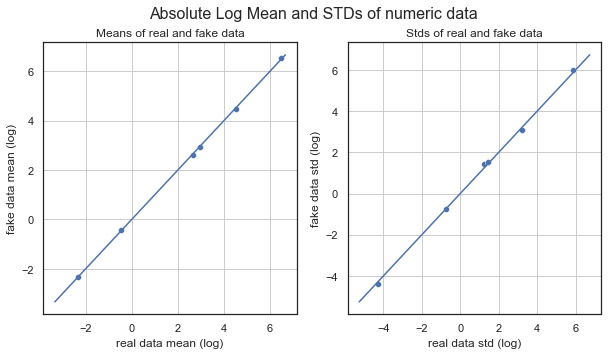

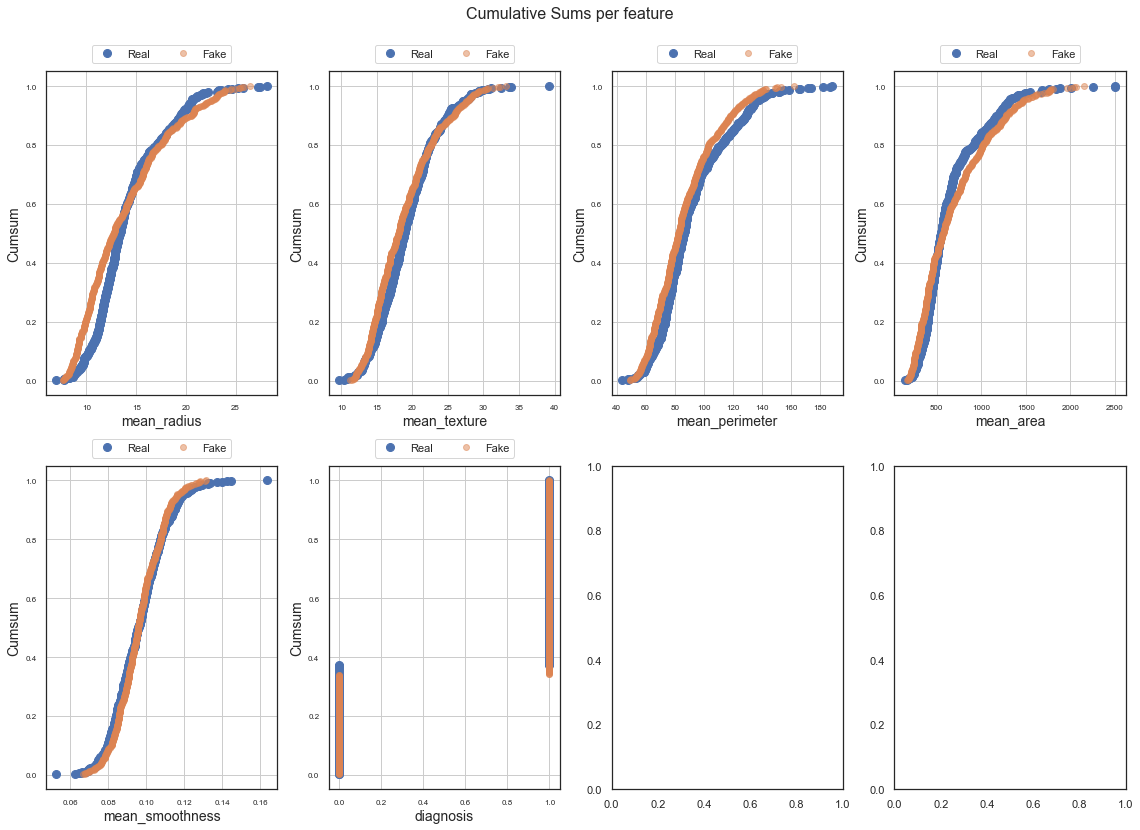

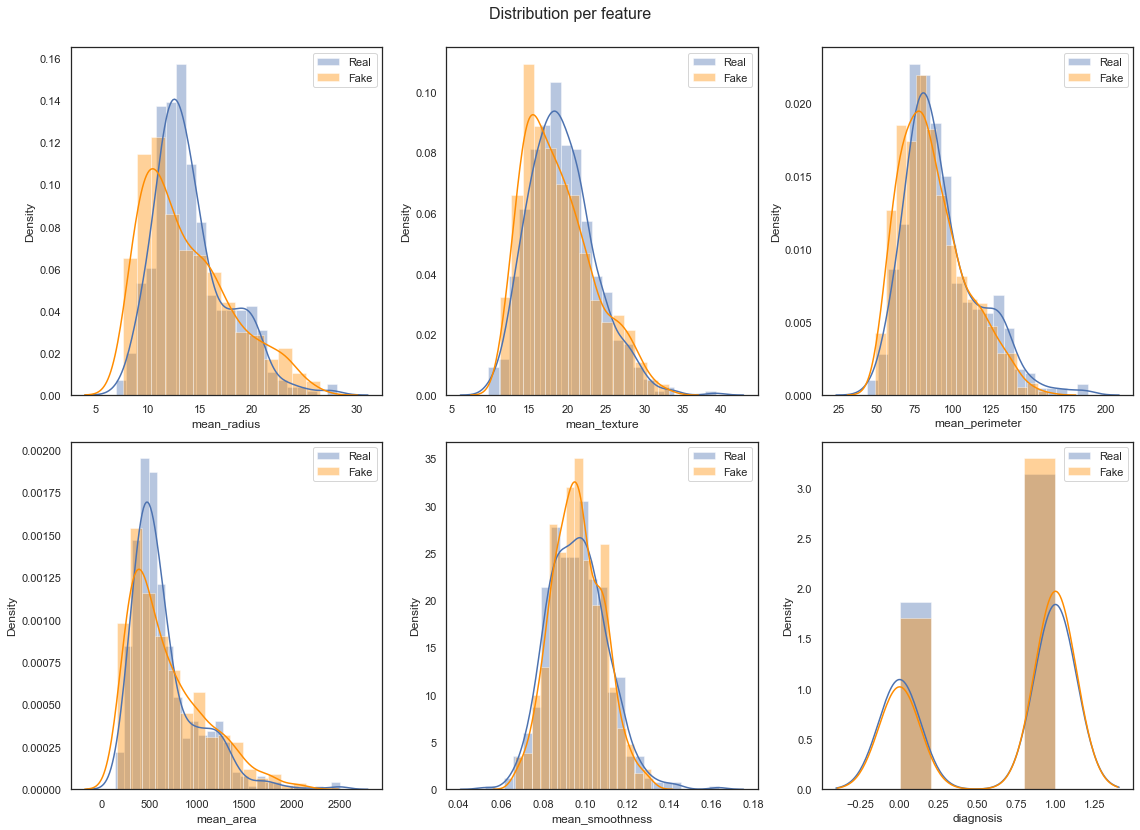

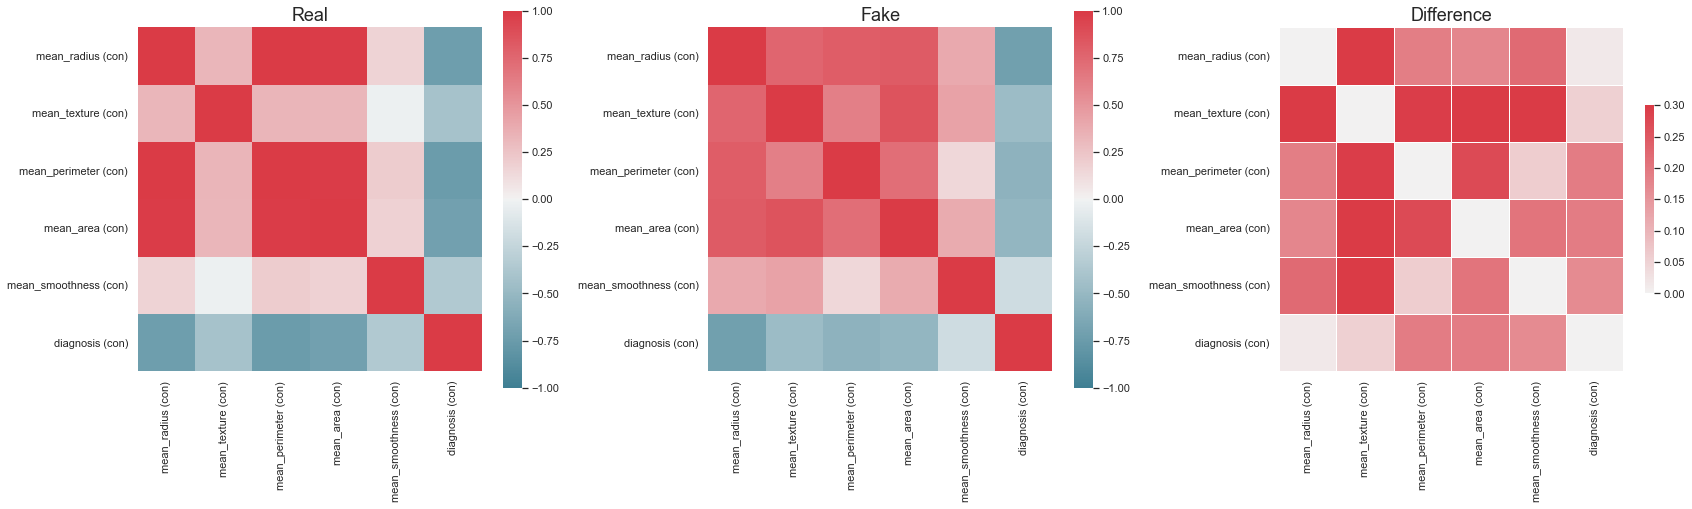

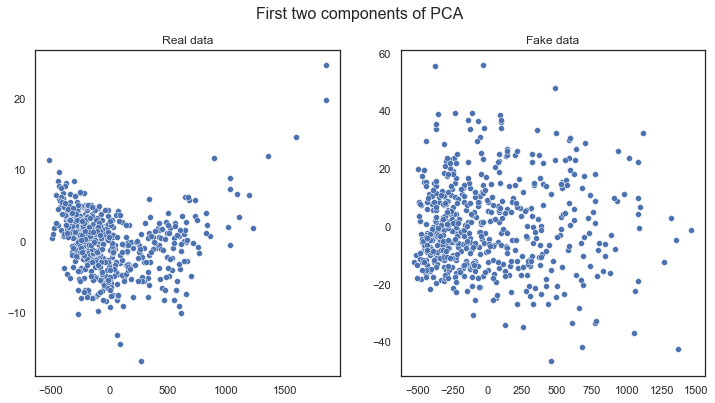

In [33]:
evaluation_report.plot_evaluation_metrics()

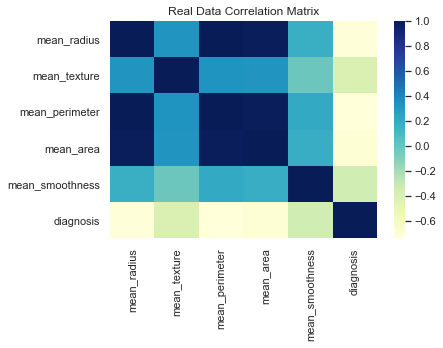

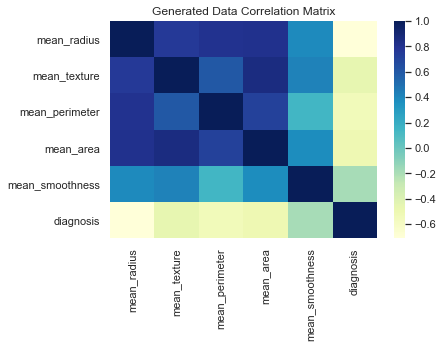

In [34]:
evaluation_report.plot_correlation()

In [35]:
evaluation_report.get_correlation_metrics()



CORRELATION METRICS
----------------------------
Euclidean Distance 1.4481573978160687
The RMSE can only be calculated when the datasets ave the same size.


In [36]:
evaluation_report.get_duplicates()



DUPLICATES
----------------------------
Real dataset contains {} duplicated rows 0
Generated dataset contains {} duplicated rows 0
Real and generated dataset contain {} duplicated rows 0


In [37]:
evaluation_report.get_KL_divergence()



KULLBACK-LEIBLER DIVERGENCE
----------------------------


ValueError: operands could not be broadcast together with shapes (569,) (600,) 

#### Persist the model
Finally you might want to save the model. This can easily be done by passing a path and a name. Also you can again load in you training weights for further use. 

In [40]:
gan.save("./test", "MY_VERY_BEST_GAN.gan")

In [43]:
gan.load("./test/MY_VERY_BEST_GAN.gan", device)

In [ ]:
#michi please include parameter omtimisation here! 